<a href="https://colab.research.google.com/github/Ajay-Ravikumarrajan/Machine_Learning/blob/main/SVM/SVM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [11]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data=pd.read_csv('/content/diabetes.csv', header= 1,names=col_names)
print(data.shape)
data.head()

(767, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [12]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [13]:
feature_cols=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x=data[feature_cols]
y=data.label

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(536, 7)

(536,)

(231, 7)

(231,)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [16]:
model=SVC(kernel='rbf',random_state=0)
model.fit(x_train,y_train)
SVC_prediction=model.predict(x_test)
print('SVC Prediction: ',SVC_prediction)

SVC Prediction:  [0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 1]


In [18]:
conf_mat=metrics,confusion_matrix(y_test,SVC_prediction)
print('SVC [ kernel - rbf]')
print('Confusion Matrix: \n',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,SVC_prediction)
print('Accuracy Score: ',Accuracy_score)
print('Accuracy in Percentage: ', int(Accuracy_score*100),'%')
print(classification_report(SVC_prediction,y_test))

SVC [ kernel - rbf]
Confusion Matrix: 
 (<module 'sklearn.metrics' from '/usr/local/lib/python3.12/dist-packages/sklearn/metrics/__init__.py'>, array([[133,   9],
       [ 43,  46]]))
Accuracy Score:  0.7748917748917749
Accuracy in Percentage:  77 %
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       176
           1       0.52      0.84      0.64        55

    accuracy                           0.77       231
   macro avg       0.73      0.80      0.74       231
weighted avg       0.84      0.77      0.79       231



[Text(0.5, 1.0, 'SVC [rbf]')]

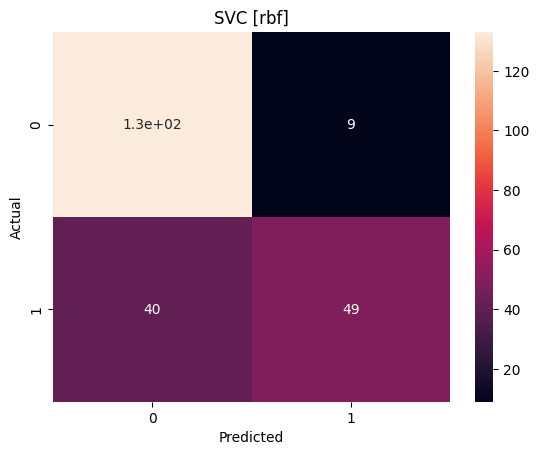

In [24]:
conf_mat=pd.crosstab(y_test,SVC_prediction,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True).set(title='SVC [rbf]')

In [25]:
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)
SVC_prediction=model.predict(x_test)
print('SVC Prediction: ',SVC_prediction)

SVC Prediction:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 1]


In [26]:
conf_mat=metrics,confusion_matrix(y_test,SVC_prediction)
print('SVC [ kernel - linear]')
print('Confusion Matrix: \n',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,SVC_prediction)
print('Accuracy Score: ',Accuracy_score)
print('Accuracy in Percentage: ', int(Accuracy_score*100),'%')
print(classification_report(SVC_prediction,y_test))

SVC [ kernel - linear]
Confusion Matrix: 
 (<module 'sklearn.metrics' from '/usr/local/lib/python3.12/dist-packages/sklearn/metrics/__init__.py'>, array([[133,   9],
       [ 40,  49]]))
Accuracy Score:  0.7878787878787878
Accuracy in Percentage:  78 %
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       173
           1       0.55      0.84      0.67        58

    accuracy                           0.79       231
   macro avg       0.74      0.81      0.76       231
weighted avg       0.84      0.79      0.80       231



[Text(0.5, 1.0, 'SVC [linear]')]

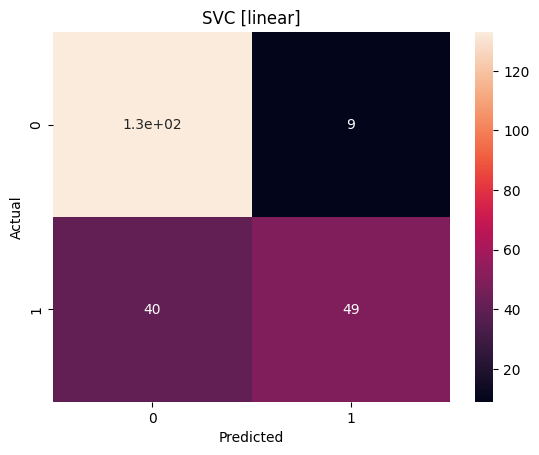

In [27]:
conf_mat=pd.crosstab(y_test,SVC_prediction,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True).set(title='SVC [linear]')